In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Calculate the counts
total_transactions = len(df)
fraud_transactions = df['Class'].sum()  # Assuming 'Class' column has 1 for fraud and 0 for legitimate
legitimate_transactions = total_transactions - fraud_transactions

# Calculate percentages
fraud_percentage = (fraud_transactions / total_transactions) * 100
legitimate_percentage = (legitimate_transactions / total_transactions) * 100

# Create a table
table = pd.DataFrame({
    'Transaction Type': ['Fraudulent', 'Legitimate', 'Total'],
    'Count': [fraud_transactions, legitimate_transactions, total_transactions],
    'Percentage': [fraud_percentage, legitimate_percentage, 100]
})

print(table)


  Transaction Type   Count  Percentage
0       Fraudulent     492    0.172749
1       Legitimate  284315   99.827251
2            Total  284807  100.000000


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Extract the transaction hour
df['Hour'] = (df['Time'] // 3600) % 24

# Inspect the data
print(df[['Time', 'Hour']].head())


   Time  Hour
0   0.0   0.0
1   0.0   0.0
2   1.0   0.0
3   1.0   0.0
4   2.0   0.0


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Extract the transaction hour for the whole dataset
df['Hour'] = (df['Time'] // 3600) % 24

# Inspect the first few rows to verify the new feature
print(df[['Time', 'Hour']].head())

# Optionally, save the updated DataFrame to a new CSV file
df.to_csv('creditcard_fraud_with_hour.csv', index=False)


   Time  Hour
0   0.0   0.0
1   0.0   0.0
2   1.0   0.0
3   1.0   0.0
4   2.0   0.0


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

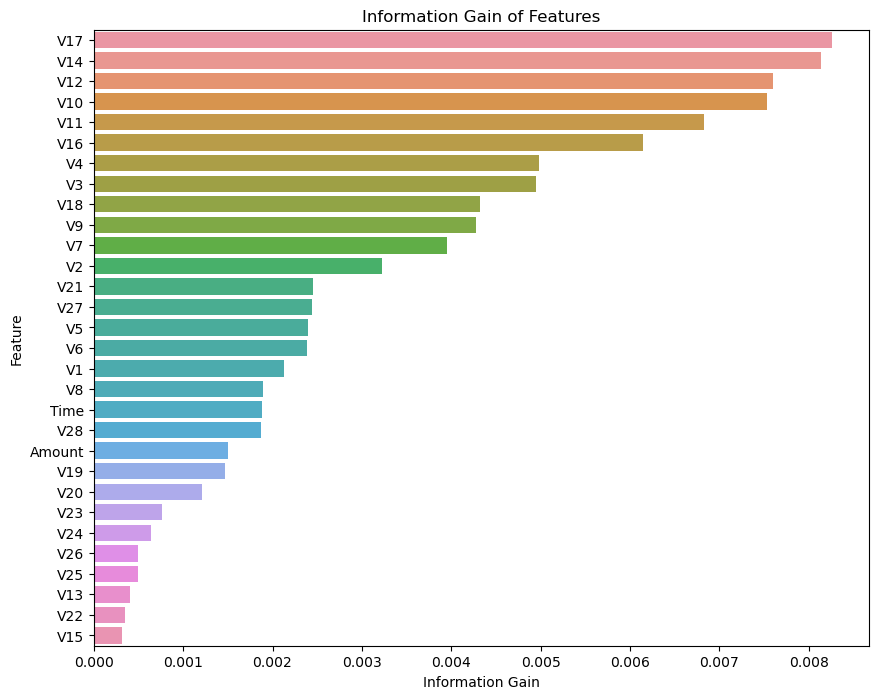

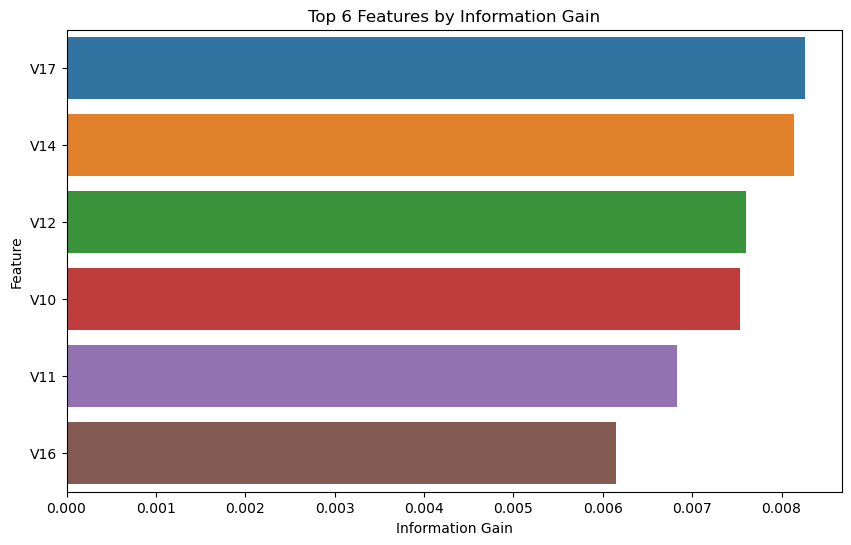

In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv("creditcard.csv")
except FileNotFoundError:
    print("File not found. Please ensure the file path is correct.")
    exit()

# Inspect the dataset
print(df.head())

# Prepare the data
try:
    X = df.drop(columns=['Class'])  # Features
    y = df['Class']  # Target variable
except KeyError:
    print("Column 'Class' not found in the dataset. Please check the column names.")
    exit()

# Calculate information gain
try:
    info_gain = mutual_info_classif(X, y)
except ValueError as e:
    print(f"Error in calculating information gain: {e}")
    exit()

# Create a DataFrame to store feature names and their corresponding information gain
feature_scores = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})

# Sort the features by information gain
feature_scores = feature_scores.sort_values(by='Information Gain', ascending=False)

# Display the top 6 features
top_features = feature_scores.head(6)['Feature'].tolist()
print("Top 6 features by Information Gain:", top_features)

# Plotting the Information Gain of all features
plt.figure(figsize=(10, 8))
sns.barplot(x='Information Gain', y='Feature', data=feature_scores)
plt.title('Information Gain of Features')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.show()

# Plotting the Information Gain of the top 6 features
top_feature_scores = feature_scores.head(6)
plt.figure(figsize=(10, 6))
sns.barplot(x='Information Gain', y='Feature', data=top_feature_scores)
plt.title('Top 6 Features by Information Gain')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

ROC-AUC Score: 0.9712275368081953
Accuracy Score: 0.9612548716688318


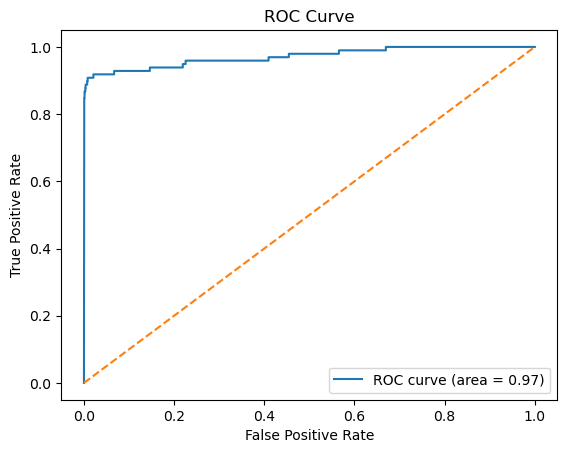

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Prepare the data
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [5]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 901.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.1 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.6 MB/s eta 0:00:00
Note: you may need to 

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC Score: 0.9161658895409599
Accuracy Score: 0.9830588813595028


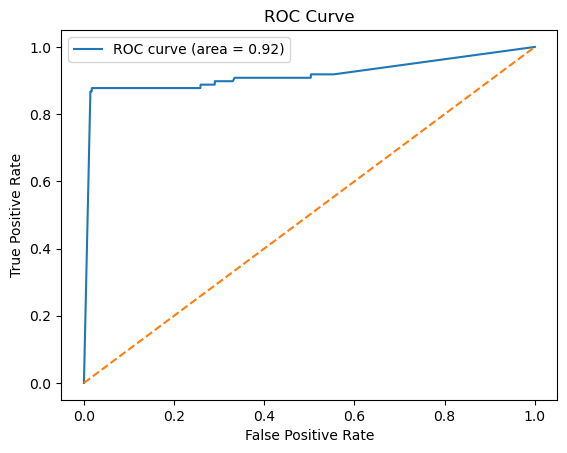

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
Best parameters found: {'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 91}
[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> init

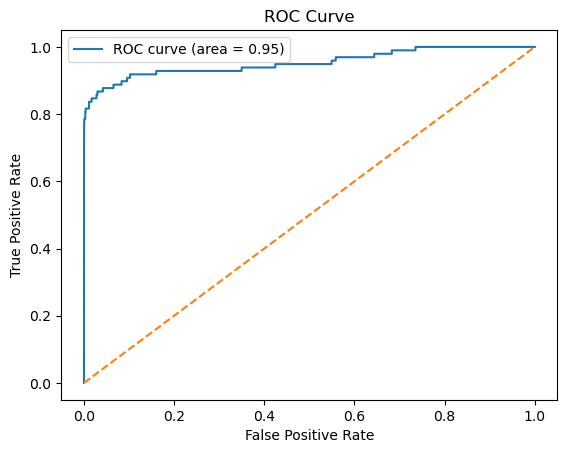

In [7]:
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Prepare the data
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create the dataset for LightGBM
d_train = lgb.Dataset(X_train, label=y_train)

# Define initial hyperparameters
params = {
    'objective': 'binary',
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.05,
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'is_unbalance': True  # To handle the imbalance in the dataset
}

# Train the initial model
clf = lgb.train(params, d_train, 100)

# Make predictions
y_pred = clf.predict(X_test)

# Convert probabilities to binary output
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report
print(classification_report(y_test, y_pred_binary))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy Score: {accuracy}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show(block=False)  # Non-blocking show

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [31, 61, 91],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Initialize the model for GridSearchCV
model = LGBMClassifier(objective='binary', is_unbalance=True, metric='auc')

# Grid search for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters found: {grid.best_params_}")

# Use the best parameters to train the final model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary output
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report for the tuned model
print(classification_report(y_test, y_pred_binary))

# ROC-AUC score for the tuned model
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

# Accuracy score for the tuned model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy Score: {accuracy}")

# Plot ROC curve for the tuned model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show(block=False)  # Non-blocking show


In [2]:
pip install xgboost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9682378578893572
Accuracy Score: 0.9995259997893332


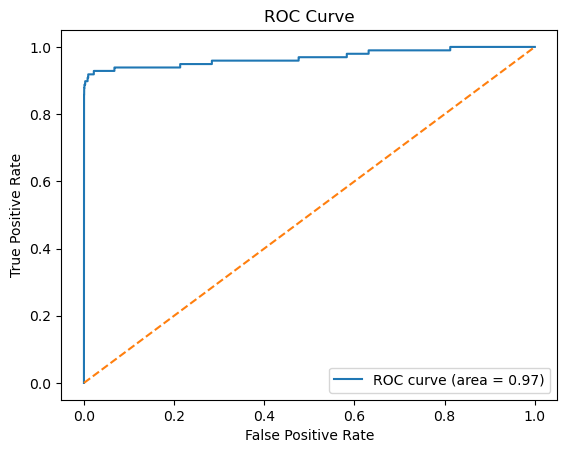

Best parameters found: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'scale_pos_weight': 577.2868020304569}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9732517901645745
Accuracy Score: 0.9995435553526912


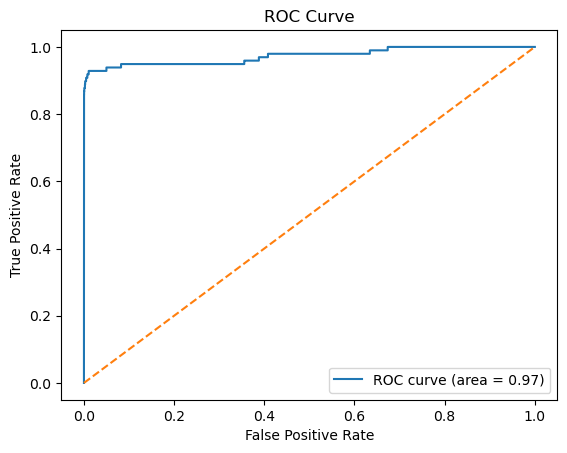

In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Prepare the data
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the initial XGBoost model with basic parameters
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])
)

# Train the initial model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'scale_pos_weight': [len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

# Grid search for hyperparameter tuning
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best parameters found: {grid.best_params_}")

# Use the best parameters to train the final model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary output
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Classification report for the tuned model
print(classification_report(y_test, y_pred_binary))

# ROC-AUC score for the tuned model
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

# Accuracy score for the tuned model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy Score: {accuracy}")

# Plot ROC curve for the tuned model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
